In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [2]:
# pattern 2
cep_one_phase_file_path = "C:\\Users\\GE796684\\Documents\\metrics\\pattern_2\\flink_job_pattern2-cep-one-phase_final.xlsx"
cep_three_phase_file_path = "C:\\Users\\GE796684\\Documents\\metrics\\pattern_2\\flink_job_pattern2-cep-three-phase_final.xlsx"

sp_one_phase_file_path = "C:\\Users\\GE796684\\Documents\\metrics\\pattern_2\\MemLatPattern2SP.xlsx"
sp_three_phase_file_path = sp_one_phase_file_path


# Define the columns and row range
columns = ["B", "D", "F", "H", "J"]

start_row = 2

In [3]:
custom_palette = {
    "LatP9": "#FFDAB9",  # light orange
    "LatP6": "#90EE90",  # light green
    "LatP3": "#ADD8E6",  # light blue
    "LatP1": "#FF7F7F",  # light red
}

In [4]:
def extract_data(file_path, label, end_row, excel_sheets, parallelism_label):
    wb = load_workbook(filename=file_path, data_only=True)
    records = []
    for sheet_name in excel_sheets:
        sheet = wb[sheet_name]
        for col in columns:
            for row in range(start_row, end_row + 1):
                val = sheet[f"{col}{row}"].value
                if val is not None:
                    records.append(
                        {"Latency": val, "Parallelism": parallelism_label, "System": label}
                    )
    return pd.DataFrame(records)

In [5]:
def load_data(cep_pt_one, cep_pt_three, sp_pt_one, sp_pt_three, parallelism_label):
    df_cep_one = extract_data(cep_one_phase_file_path, "CEP One", 1278, cep_pt_one, parallelism_label)
    df_cep_one["Side"] = "Left"

    df_cep_three = extract_data(cep_three_phase_file_path, "CEP Three", 601, cep_pt_three, parallelism_label)
    df_cep_three["Side"] = "Left"

    df_sp_one = extract_data(sp_one_phase_file_path, "SP One", 3724, sp_pt_one, parallelism_label)
    df_sp_one["Side"] = "Right"

    df_sp_three = extract_data(sp_three_phase_file_path, "SP Three", 1790, sp_pt_three, parallelism_label)
    df_sp_three["Side"] = "Right"

    return pd.concat([df_cep_one, df_cep_three, df_sp_one, df_sp_three], ignore_index=True)


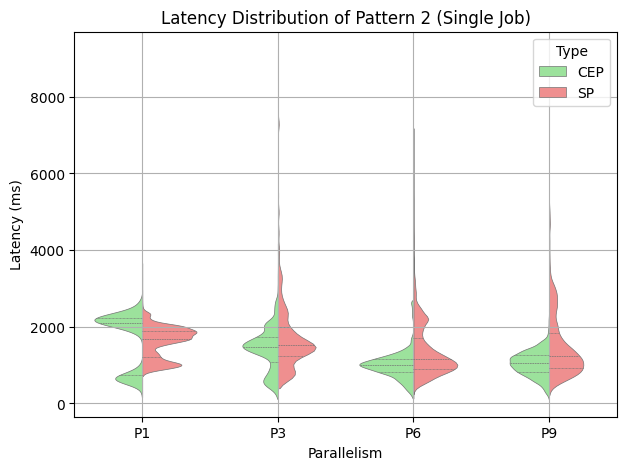

In [6]:
df_p1 = load_data(["LatP1"],["LatP1"],["LatP1-1p"],["LatP1-3p"], "P1")
df_p3 = load_data(["LatP3"],["LatP3"],["LatP3-1p"],["LatP3-3p"], "P3")
df_p6 = load_data(["LatP6"],["LatP6"],["LatP6-1p"],["LatP6-3p"], "P6")
df_p9 = load_data(["LatP9"],["LatP9"],["LatP9-1p"],["LatP9-3p"], "P9")

df_all = pd.concat([df_p1,df_p3,df_p6,df_p9], ignore_index=True)


plt.figure(figsize=(7, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    hue="Side",
    data=df_all,
    split=True,
    inner="quart",
    palette={
        "Left": "#90EE90",  # light green
        "Right": "#FF7F7F",  # light red
    },
    linewidth=0.5,
    cut=0
)

plt.title("Latency Distribution of Pattern 2 (Single Job)")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0,1,2,3], labels=["P1","P3","P6","P9"])

handles, labels = plt.gca().get_legend_handles_labels()
custom_legend = ["CEP", "SP"]
plt.legend(handles[:2], custom_legend, title="Type")
plt.grid(True)
plt.show()

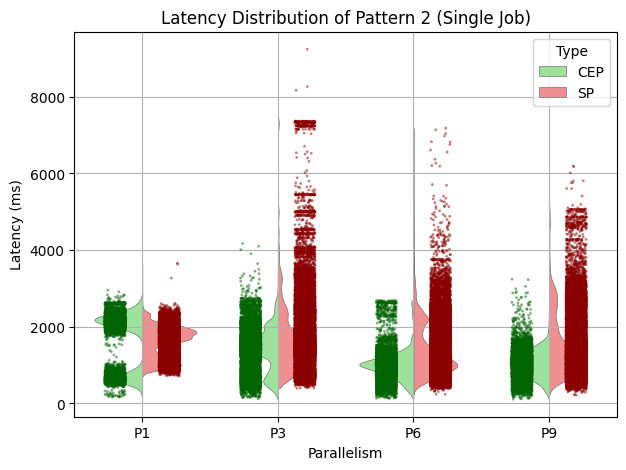

In [7]:
df_p1 = load_data(["LatP1"],["LatP1"],["LatP1-1p"],["LatP1-3p"], "P1")
df_p3 = load_data(["LatP3"],["LatP3"],["LatP3-1p"],["LatP3-3p"], "P3")
df_p6 = load_data(["LatP6"],["LatP6"],["LatP6-1p"],["LatP6-3p"], "P6")
df_p9 = load_data(["LatP9"],["LatP9"],["LatP9-1p"],["LatP9-3p"], "P9")

df_all = pd.concat([df_p1,df_p3,df_p6,df_p9], ignore_index=True)


plt.figure(figsize=(7, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    hue="Side",
    data=df_all,
    split=True,
    inner=None,
    palette={
        "Left": "#90EE90",  # light green
        "Right": "#FF7F7F",  # light red
    },
    linewidth=0.5,
    cut=0
)

sns.stripplot(
    x="Parallelism",
    y="Latency",
    hue="Side",
    data=df_all,
    dodge=True,          # offset Left/Right for visibility
    jitter=0.15,         # horizontal jitter
    palette={
        "Left": "#006400",   # dark green
        "Right": "#8B0000",  # dark red
    },
    marker='o',
    size=2,
    alpha=0.5
)

plt.title("Latency Distribution of Pattern 2 (Single Job)")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0,1,2,3], labels=["P1","P3","P6","P9"])

handles, labels = plt.gca().get_legend_handles_labels()
custom_legend = ["CEP", "SP"]
plt.legend(handles[:2], custom_legend, title="Type")
plt.grid(True)
plt.show()